# **Project:** Song Data Analysis

**Problem Setting and definition:**

The objective of this project is to draw popularity insights depicting the data story of Spotify songs data.



1) Identifying feature ranges which make song popular

---


2) Statistics of Top performing Genres and Artists

---


3) Latest trends in songs using Time series analysis


**Data Source**: \
https://www.kaggle.com/code/aeryan/spotify-music-analysis/data


**Data Description:**


The Kaggle dataset contains a list of 2000 songs and their features like popularity, acoustics, and danceability.
It has songs and artists’ data from 1998 to 2020 along with high-level features such as duration, energy, tempo, time signature, loudness, pitches, valence, danceability, timbres, key, and mode.
Descriptions of these audio features Columns are as follows taken from the Spotify Web API.


**Name**: Name of the song\
**Artists**: Artist(s) of the song\
**Genre**: Song genre\
**Year**: Song year\
**Duration**: Song duration captured in milliseconds\
**Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.\
**Danceability**:  describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.\
**Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.\
**Key**: The key the track is in ranges from 0 to 11. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.\
**Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.\
Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.\
**Liveness**: The higher the value, the more likely the song is a live recording.\
**Valence**: The higher the value, the more positive the mood for the song.\
**Explicit**: An explicit track is one that has curse words\
**Popularity**:  It is a dependent feature. The popularity score calculated taking into account both the number of days a song stayed in the Top200 and the position it stayed in every day, weighing more the top positions.\
**Tempo**: It is the speed or pace of a given music track.
Instrumentalness: It predicts whether the track contains no vocals. Instrumentalness value above 0.5 is intended for instrumental songs.


**Import all the required libraries**


In [1]:
## Import all the required libraries

## Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px 


## Preprocessing Libraries
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


## metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')



**Upload Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [102]:
songs = pd.read_csv('/content/drive/MyDrive/SemesterTwo/6600/6600ComputationAndVisualization/Project1/archive/songs_normalize.csv')
songs.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

# **Popularity Insight using Seaborn**

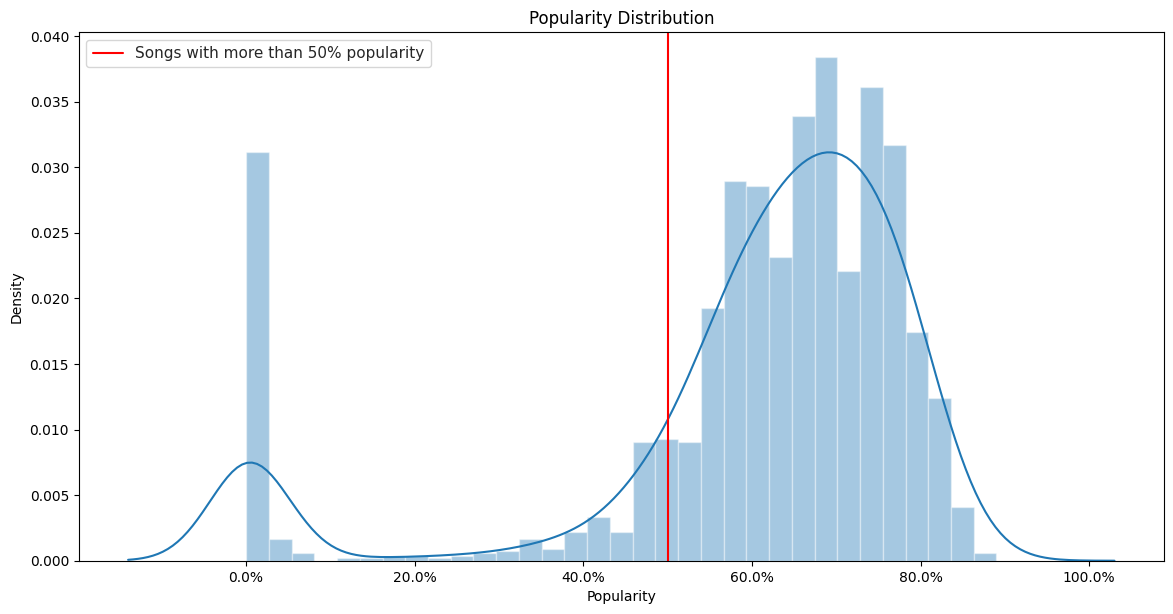

In [4]:
#matplotlib Figure and Axes objects, specifying how big the figure is
fig, ax = plt.subplots(figsize=(14,7))
fig.set_dpi(100)

# seaborn styling option to display figure in grid format for better visibility
sns.set(style="whitegrid")   

x = pd.Series(songs['popularity'], name="Popularity")
g = sns.distplot(x)
g.set(xlabel='Popularity', ylabel='Density')

plt.title("Popularity Distribution")

# line indicating 50% popularity mark for songs
plt.axvline(x = 50, color = 'red', label = 'Songs with more than 50% popularity')
plt.legend()

# Adding % sign to x axis labels
xlabels = ['{}'.format(x) + '%' for x in g.get_xticks()]
g.set_xticklabels(xlabels)
plt.show()

#### Histogram A histogram with discrete bins is counting the number of songs for each popularity value on x axis.

#### Kernel density estimation (KDE) is displayed with the blue approximation line which is producing a continuous density estimate.





#### Distribution statistics 

Q1 = 56\
Q3 = 75\
Mean = 59.8725\
Minimum	= 0\
Maximum	= 89\
Outlier Zeros =	no of songs with zero popularity - 126




#### Overall distribution is normal but with extreme outlier occurring at 0% popularity.

#### This indiacates that most of the songs from the dataset pass through the 50% popularity distribution value indicated by red line in the above graph.

#### These are the songs which are hit tracks and this report is aimed at analysis of characteristics like duration of song, loudness, dancibility of these popular tracks to understand how they contribute in making a song hit !!

#### This analysis result can be utilised by music artists and producers to understand the factors in songs which make it popular!!

#### **Optimal feature of song for making it popular**

In [38]:
## Analysis of Top 10 popular songs 
df = songs[['duration_ms','loudness',	'energy',	'tempo','danceability','valence','popularity']].groupby('popularity').mean().reset_index()
df = df.sort_values(by="popularity", ascending=False)

top = df.head(10)
top

,popularity,duration_ms,loudness,energy,tempo,danceability,valence
75,89,240400.000000,-2.810000,0.807000,124.053000,0.612000,0.398000
74,88,244360.000000,-8.532000,0.537000,122.769000,0.445000,0.131000
73,87,290320.000000,-2.827000,0.669000,112.238000,0.908000,0.662000
72,86,220272.500000,-7.435250,0.489500,109.018750,0.603750,0.418000
71,85,240036.142857,-5.162143,0.687000,126.503143,0.629857,0.506571
70,84,216293.181818,-7.060818,0.555455,102.424545,0.626273,0.398091
69,83,226087.066667,-6.926733,0.601600,118.874933,0.699067,0.490067
68,82,219710.760000,-5.518120,0.709120,113.985720,0.698960,0.617040
67,81,231711.925926,-4.961741,0.738593,115.859667,0.713519,0.531444
66,80,215025.023256,-5.532907,0.700907,116.201326,0.649674,0.516023


#### The above mentioned table shows the top 10 popular song features where popularity is between 80% to 90%. 

#### These values through light on the feature ranges which could potentially help artists in producing popular music tracks.

#### Numerical Feature ranges

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

# **Identifying feature ranges which make song popular**


In [33]:
feature_cols = ['duration_ms','loudness',	'energy',	'tempo','danceability','valence']



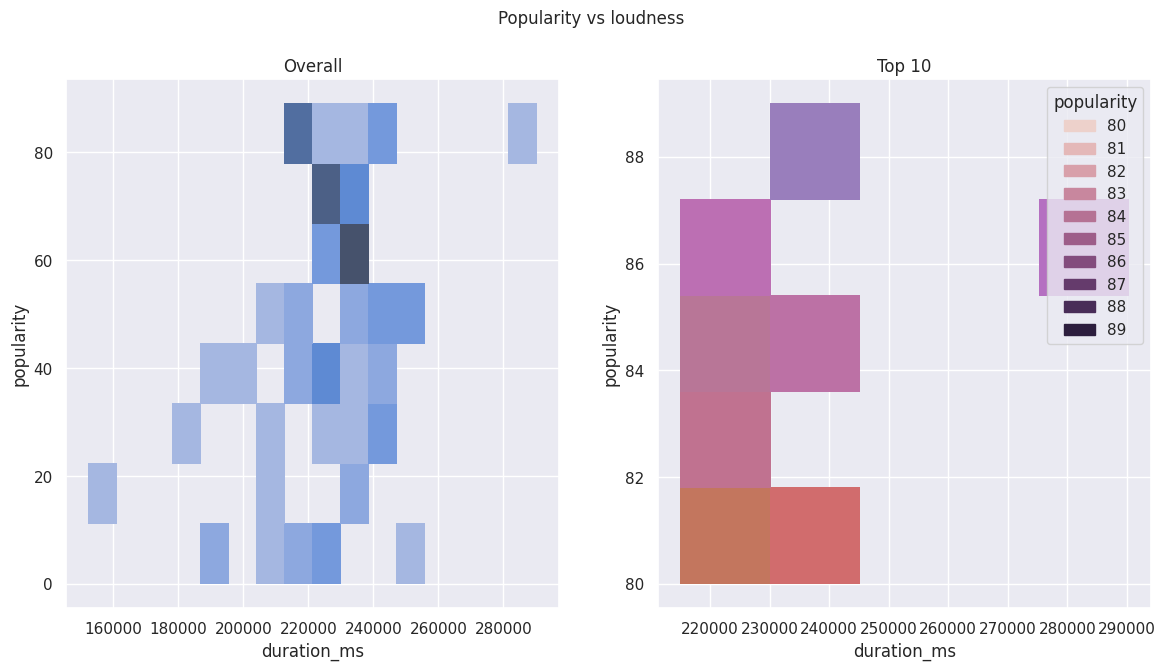

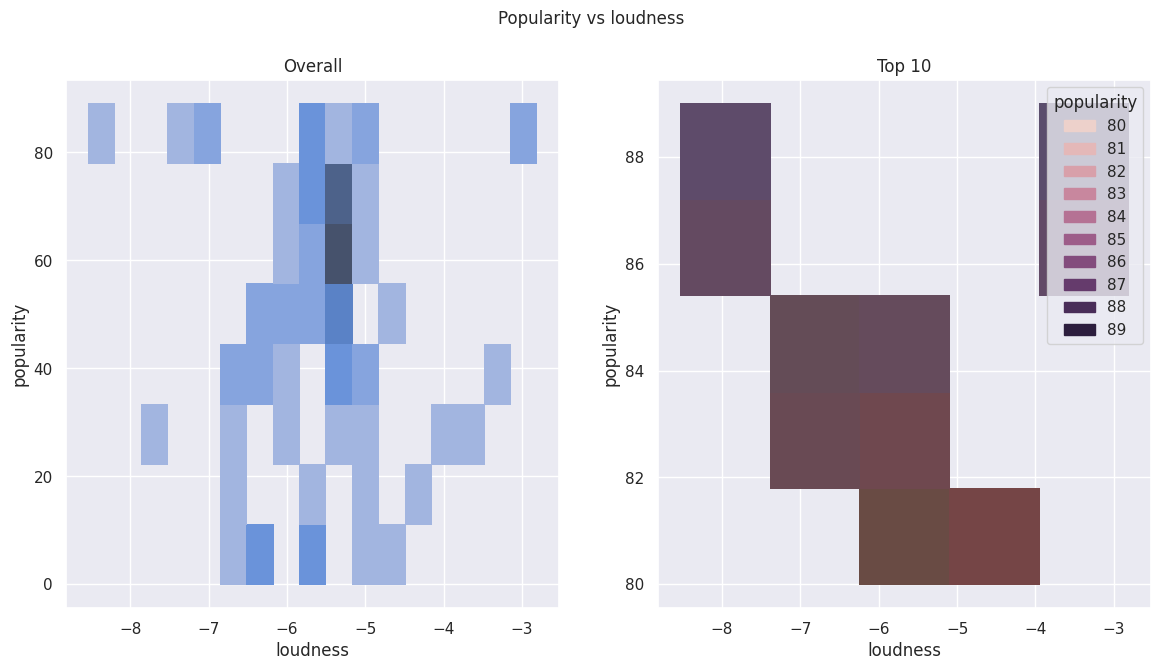

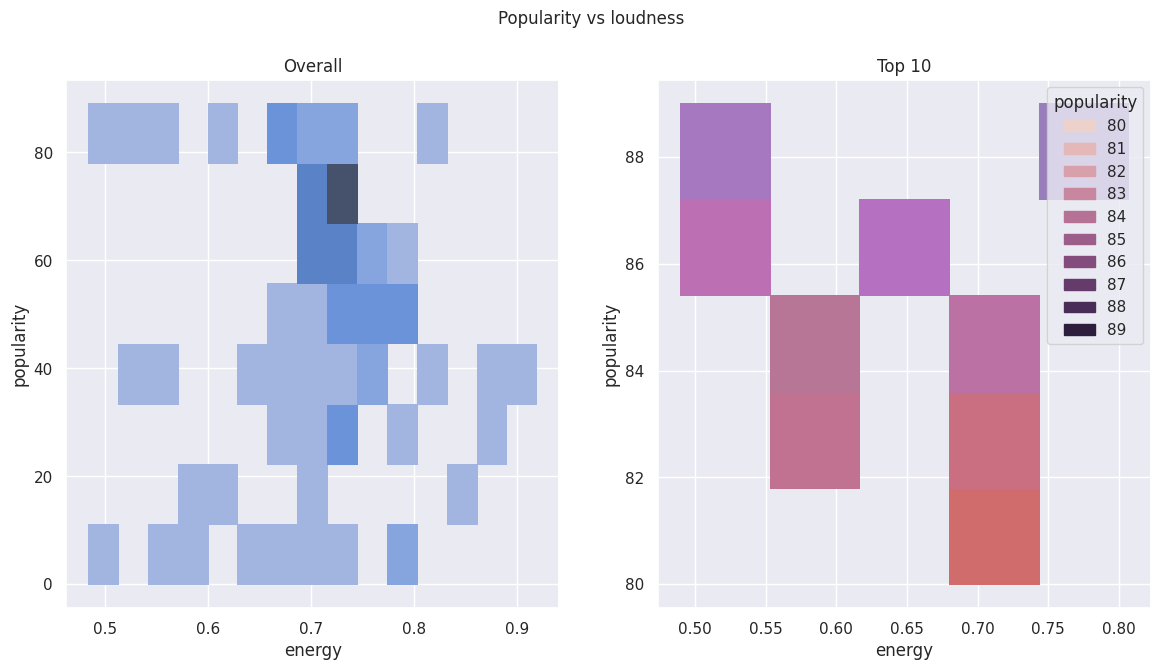

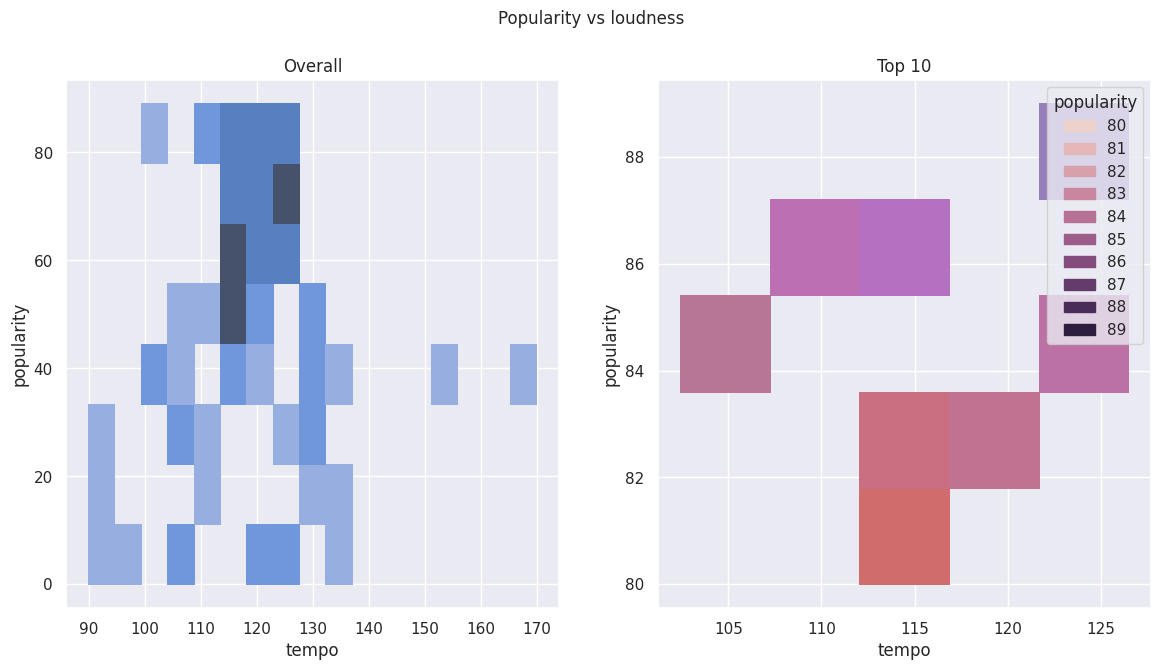

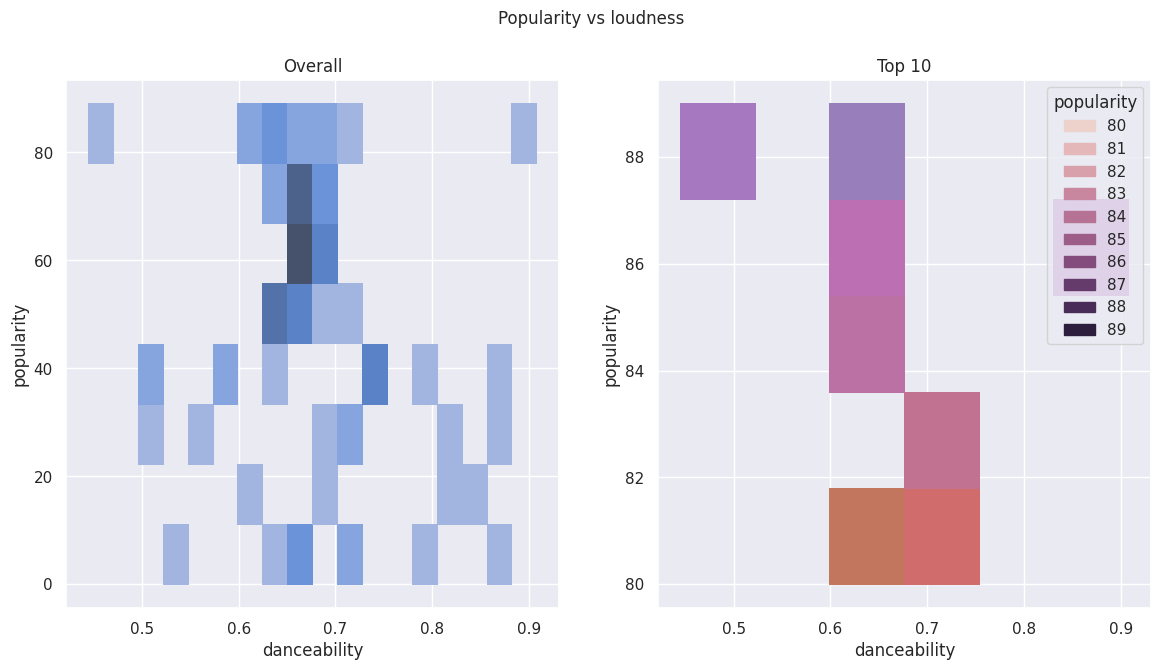

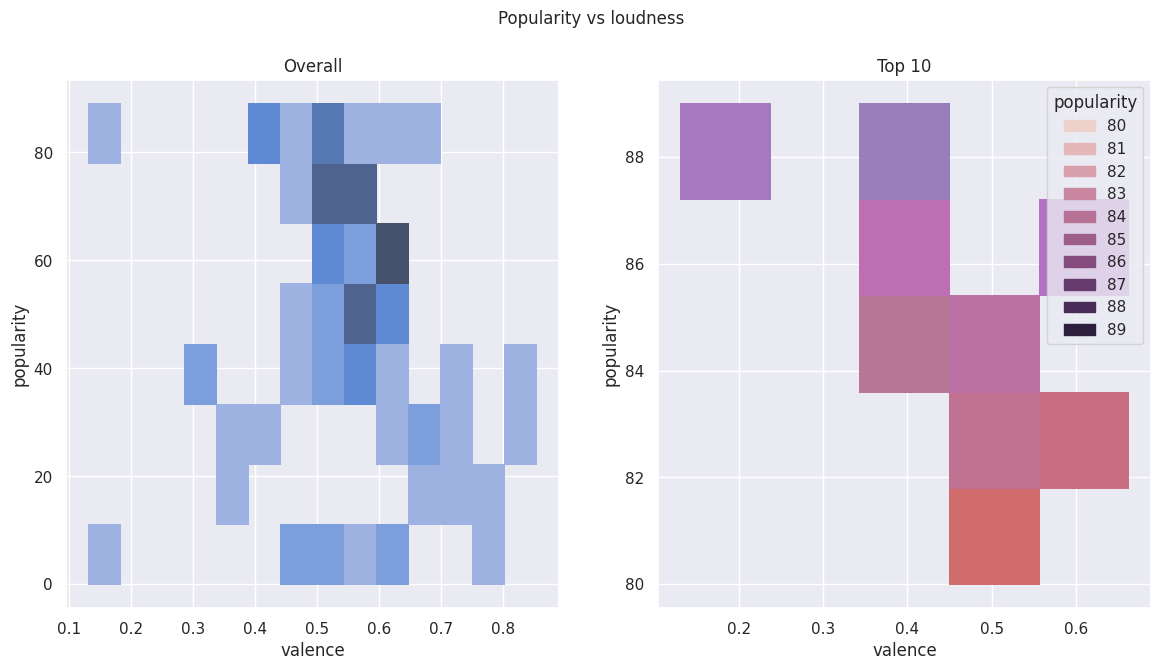

In [34]:

sns.set_style('darkgrid')


for i in feature_cols : 
  fig, axes = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle('Popularity vs loudness')
  fig.set_dpi(100)


  sns.histplot(ax=axes[0], x=df[i], y=df['popularity'], data = df)
  axes[0].set_title("Overall")

  sns.histplot(ax=axes[1], x=top[i], y=top['popularity'], data = top, hue =top['popularity'] )
  axes[1].set_title("Top 10")

  fig.show()




#### **Duration of song for making it popular**

#### This subplot shows that song duration of 3 mins to 4 mins is optimal in making a popular song.

#### **Loudness of song for making it popular**

#### This subplot shows that very high and very low values of loudness are not making song popular. The loudness of -6 to -4 db range is observed in top popular songs.

#### **Energy of song for making it popular**

#### This subplot shows that popular songs have high energy values between 0.7 to 0.8.

#### **Tempo of song for making it popular**

#### This subplot shows that 120 to 130 pace/tempo of songs make it popular. Fast paced songs are more popular.

#### **Danceability of song for making it popular**

#### This subplot shows that greater danceability values >0.7 make the songs popular. As these songs can be played in clubs and restaurants they have more audience outreach. 

#### **Valence of song for making it popular**

#### This subplot shows that generally happy songs with valence more than > 0.5 makes the song popular. But surprisingly it is not the only range. Low valence sad and emotional songs are popular as well with valence of 0.4 or even less.

# **Song Statistics using plotly**

In [43]:
# extracting top 10 genres
top10_genres = songs.nlargest(10, 'popularity')

fig = px.bar(top10_genres,x='genre', y=['valence', 'energy', 'danceability','acousticness'], barmode='group')
fig.show()

It can be seen that the Hio-hop music has largest danceability and pop music produces largest valence.

High danceability, energy corresponds to more popular songs in general irrespective of the genre.

**Top Artists by Popularity**

In [ ]:
popular_artists = songs[['artist','popularity']].groupby('artist').mean().reset_index()
popular_artists = popular_artists.sort_values(by='popularity', ascending=False)

In [ ]:

fig = px.bar(popular_artists,y='popularity', x='artist')
fig.show()

**Top Artists by No. of songs**

In [ ]:
top_artists = songs[['artist','song']].groupby('artist').count().reset_index()
top_artists = top_artists.sort_values(by='song', ascending=False)

In [ ]:
fig = px.bar(top_artists,y='song', x='artist')
fig.show()

**Top Genres by Popularity**

In [ ]:
popular_genre = songs[['genre','popularity']].groupby('genre').mean().reset_index()
popular_genre = popular_genre.sort_values(by='popularity', ascending=False)

In [ ]:
fig = px.bar(popular_genre,y='popularity', x='genre')
fig.show()

**Top Genres by No. of songs**

In [ ]:
top_genre = songs[['genre','song']].groupby('genre').count().reset_index()
top_genre = top_genre.sort_values(by='song', ascending=False)

In [ ]:
fig = px.bar(top_genre,y='song', x='genre')
fig.show()

# **Time series Analysis to extract Trends in Music industry using matplotlib**

In [120]:

fig = px.bar(songs, x='genre', y="genre", color="genre",
  animation_frame="year", animation_group="genre", range_y=[3, 70], 
             title='Graph to indicate the change of music through years')
fig.show()


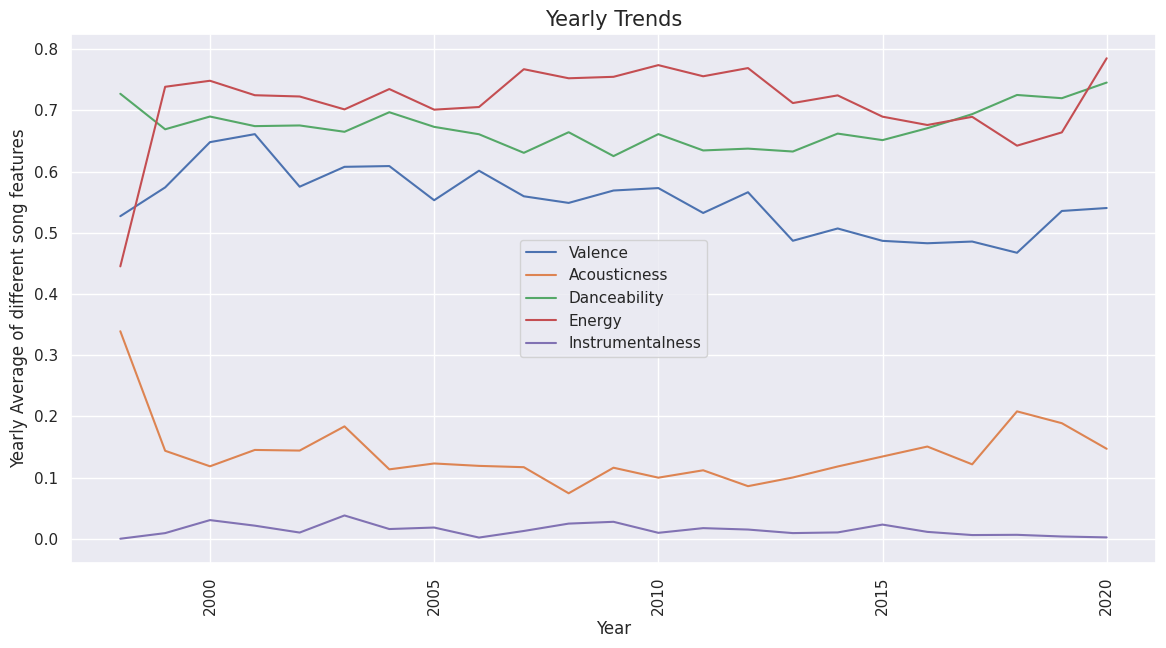

In [35]:
## matplotlib figure size
figure(figsize=(14, 7), dpi=100)

## Yearly average values in valence, acousticness, danceability, energy, instrumentalness of song tracks
df = songs[['valence','acousticness',	'danceability',	'energy','instrumentalness', 'year']].groupby('year').mean().reset_index()

x = df['year']

y = df[['valence','acousticness',	'danceability',	'energy','instrumentalness']]

plt.plot(x, y.iloc[:,0], label='Valence')
plt.plot(x, y.iloc[:,1], label='Acousticness')
plt.plot(x, y.iloc[:,2], label='Danceability')
plt.plot(x, y.iloc[:,3], label='Energy')
plt.plot(x, y.iloc[:,4], label='Instrumentalness')

plt.legend(loc='best')

## xlabel
plt.xlabel('Year')
plt.xticks(rotation =90)

## ylabel
plt.ylabel('Yearly Average of different song features')

## Title of Plot
plt.title('Yearly Trends', fontdict={'fontname':'DejaVu Sans', 'fontsize':15})
plt.show()



#### In this visualization, trends in valence, acousticness, danceability, energy, instrumentalness with time are captured.

#### From the visualization, it can be seen that average values of acousticness and instrumentalness of songs over the perio of 20 years has been very less than the other features. This can help music industry in identifying the yearwise trends in instrumentalness of song is fairly constant meaning the the no of songs which do not have lyrics are getting produced in very small number and they have less audience base. 

#### On the other hand, danceability of songs has shown constant increase from 2015 to 2020 except for short dip in 2019 when world was hit by covid 19 pandemic.

#### The valence/ mood of songs has remained fairly constant with slight decrese in recent decase. This indicates that happy, upbeat music has been in trend during 2000 but now sad songs have taken upward trend.

#### Energy of songs has shown flustuations over last 20 years. In late 19's Energy of songs became popular and it showed sharp peak. Afterwhich it remained fairly constant. Then it showed decline from 2012 to 2019. After covid 19 crisis it started picking up again. This data can be utilized by Music producers as it clearly shows high energy and danceability are currently in trend. It can also be interpreted from the visualization that not just happy songs but sad and more depth songs are getting picked up as well.



# **Conclusion**:

#### In this project various python libraries like seaborn, plotly, matplotlib are utilized to create interactive visualizations depicting the data story of Spotify songs data. 

#### The data analysis id done in 3 parts:


---



1) Identifying feature ranges which make song popular

---


2) Statistics of Top performing Genres and Artists

---


3) Latest trends in songs using Time series analysis


---


